## 1 加载数据&数据清洗

- 导入使用到的模块

In [1]:
from datetime import timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
sns.set()

- 加载交易数据
- 我们还是使用在线电商零售数据，计算每个SKU在一段时间内的销售数量和销售收入，这里加载12个月的数据

In [2]:
data1 = pd.read_excel('data/online_retail_II.xlsx',sheet_name='Year 2009-2010')
data2 = pd.read_excel('data/online_retail_II.xlsx',sheet_name='Year 2010-2011')
data = pd.concat([data1,data2],ignore_index=True)
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


- 我们将日期转换成日期时间类型，并从订单日期中提取12个月的数据，我们提取一整年的数据，每个月的销售数据都是完整，这样可以避免分析的误差

In [5]:
df_12m = data[(data['InvoiceDate'] > '2010-01-01') &  (data['InvoiceDate'] <= '2010-12-31')]
df_12m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522714 entries, 45228 to 567941
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      522714 non-null  object        
 1   StockCode    522714 non-null  object        
 2   Description  519889 non-null  object        
 3   Quantity     522714 non-null  int64         
 4   InvoiceDate  522714 non-null  datetime64[ns]
 5   Price        522714 non-null  float64       
 6   Customer ID  412624 non-null  float64       
 7   Country      522714 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.9+ MB


- 调整一下列名，方便后续分析，并创建新列提取月份信息

In [6]:
df_12m.columns= ['OrderNo', 'sku', 'Description', 'quantity', 'date_created',
       'UnitPrice', 'CustomerID', 'Country']

In [7]:
df_12m = df_12m.assign(month = df_12m['date_created'].dt.month )
df_12m.head()

,OrderNo,sku,Description,quantity,date_created,UnitPrice,CustomerID,Country,month
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom,1
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0,United Kingdom,1
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom,1
45231,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,United Kingdom,1
45232,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN,United Kingdom,1


- 从数据中去掉退货的商品

In [8]:
df_12m = df_12m.query('quantity>0&UnitPrice>0')
#查看数据情况
df_12m.shape[0]

509089

- 为了快速了解数据集中的季节性，使用 Seaborn 绘制每月销售量的柱状图。

Text(0.5, 1.0, 'Quantity by month')

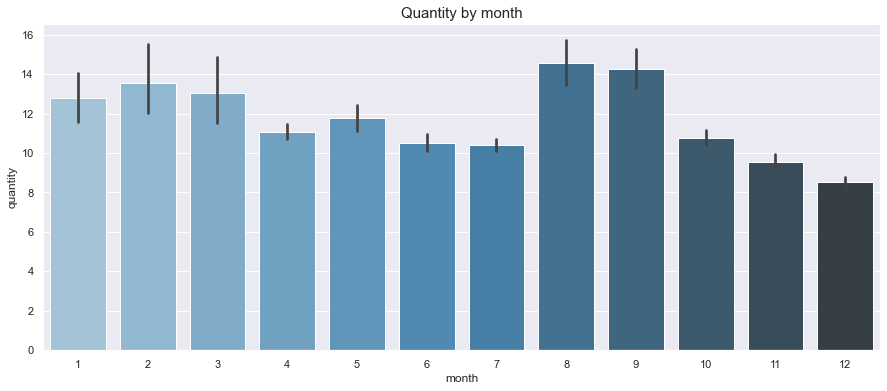

In [9]:
plt.figure(figsize=(15, 6))

sns.barplot(x='month', y='quantity', data=df_12m, palette="Blues_d").set_title("Quantity by month",fontsize=15)

- 从图中可以看出整体销量呈一定周期性，Q1、Q3销量较高

- 创建销售收入字段

Text(0.5, 1.0, 'Revenue by month')

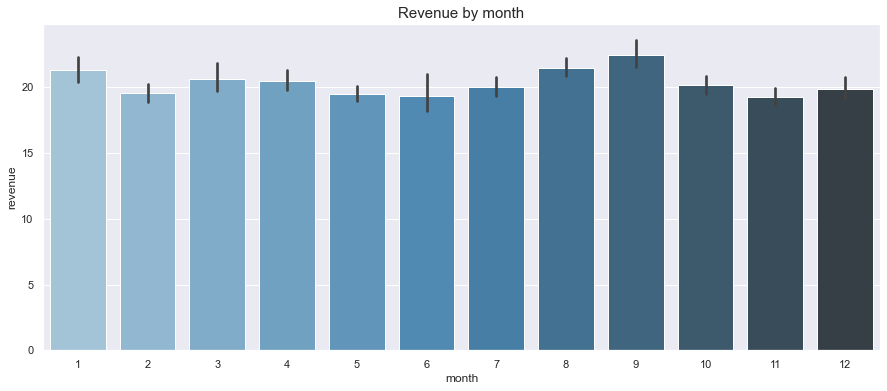

In [10]:
df_12m = df_12m.assign(revenue =df_12m['quantity']*df_12m['UnitPrice'])
plt.subplots(figsize=(15, 6))
sns.barplot(x="month", 
             y="revenue", 
             data=df_12m,
             palette="Blues_d")\
            .set_title("Revenue by month",fontsize=15)

## 2 构建XYZ模型

- 为了方便后续计算，我们先将数据按sku和month分组，计算不同sku每个月的总销量

In [16]:
df_12m.groupby(['sku', 'month'], as_index=False)['quantity'].sum()

,sku,month,quantity
0,10002,1,291
1,10002,2,257
2,10002,3,642
3,10002,4,1132
4,10002,5,1465
...,...,...,...
32717,gift_0001_70,6,1
32718,m,2,2
32719,m,4,1
32720,m,6,1


In [17]:
df_12m_units = df_12m.groupby(['sku', 'month'])['quantity'].sum().to_frame().reset_index()

In [18]:
df_12m_units

,sku,month,quantity
0,10002,1,291
1,10002,2,257
2,10002,3,642
3,10002,4,1132
4,10002,5,1465
...,...,...,...
32717,gift_0001_70,6,1
32718,m,2,2
32719,m,4,1
32720,m,6,1


- 上面的数据是长格式，而不是宽格式，需要对其进行转换。

In [23]:
df_12m_units = df_12m_units.pivot(index='sku', columns='month', values='quantity').add_prefix('m').reset_index().fillna(0)

In [24]:
df_12m_units

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,gift_0001_30,2.0,0.0,1.0,3.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,0.0
4107,gift_0001_40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4108,gift_0001_50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4109,gift_0001_70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df_test['baz']

0    1
1    2
2    3
3    4
4    5
5    6
Name: baz, dtype: int64

In [52]:
df_test['baz'].cumsum()

0     1
1     3
2     6
3    10
4    15
5    21
Name: baz, dtype: int64

In [19]:
df_test = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6]})


In [20]:
df_test

,foo,bar,baz
0,one,A,1
1,one,B,2
2,one,C,3
3,two,A,4
4,two,B,5
5,two,C,6


In [21]:
df_test.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [22]:
df_test.pivot_table(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


- XYZ模型需要计算标准差，标准差的大小代表了每月销量的波动情况

In [25]:
df_12m_units['std_demand'] = df_12m_units[['m1','m2','m3','m4','m5','m6',
                                    'm7','m8','m9','m10','m11','m12']].std(axis=1)

In [26]:
df_12m_units

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,gift_0001_30,2.0,0.0,1.0,3.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,0.0,1.073087
4107,gift_0001_40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.452267
4108,gift_0001_50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.389249
4109,gift_0001_70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675


- 接下来我们需要计算每个sku的年需求量，实际就是每月数据求和sum()

In [27]:
df_12m_units = df_12m_units.assign(total_demand = df_12m_units['m1'] + df_12m_units['m2'] + \
                                                 df_12m_units['m3'] + df_12m_units['m4'] + \
                                                 df_12m_units['m5'] + df_12m_units['m6'] + \
                                                 df_12m_units['m7'] + df_12m_units['m8'] + \
                                                 df_12m_units['m9'] + df_12m_units['m10'] + \
                                                 df_12m_units['m11'] + df_12m_units['m12']
                                  )
df_12m_units.head()

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0


- 计算完总需求之后,我们接下来计算每个SKU的平均需求

In [28]:
df_12m_units = df_12m_units.assign(avg_demand = df_12m_units['total_demand'] / 12 )
df_12m_units.head()

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0,667.583333
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0,0.666667
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0,32.333333
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0,73.416667
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0,82.583333


- 计算需求变异系数（Coefficient of Variation）

In [29]:
df_12m_units['cov_demand'] = df_12m_units['std_demand'] / df_12m_units['avg_demand']

In [30]:
df_12m_units

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0,667.583333,0.591180
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0,0.666667,2.584921
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0,32.333333,0.902208
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0,73.416667,0.826314
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0,82.583333,0.534954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,gift_0001_30,2.0,0.0,1.0,3.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,0.0,1.073087,16.0,1.333333,0.804815
4107,gift_0001_40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.452267,3.0,0.250000,1.809068
4108,gift_0001_50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.389249,2.0,0.166667,2.335497
4109,gift_0001_70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102


In [31]:
df_12m_units.sort_values(by='cov_demand', ascending=False)

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
117,20715,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.470054,400.0,33.333333,3.464102
2723,16169A,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.216878,25.0,2.083333,3.464102
813,21649,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.867513,100.0,8.333333,3.464102
3059,72739B,304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.757241,304.0,25.333333,3.464102
2019,35596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,8.371579,29.0,2.416667,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,21977,2218.0,2439.0,2376.0,2822.0,2559.0,3223.0,1878.0,3513.0,2836.0,3213.0,3104.0,2288.0,492.174789,32469.0,2705.750000,0.181900
2478,84991,2997.0,3647.0,2878.0,3195.0,3541.0,3385.0,2270.0,3543.0,3043.0,3359.0,2312.0,2097.0,535.445800,36267.0,3022.250000,0.177168
725,21533,185.0,154.0,218.0,201.0,154.0,164.0,153.0,135.0,158.0,139.0,192.0,141.0,26.638432,1994.0,166.166667,0.160312
465,21212,3924.0,4267.0,4643.0,5365.0,4336.0,4684.0,4493.0,4748.0,4668.0,6568.0,5851.0,5694.0,771.287133,59241.0,4936.750000,0.156234


- 计算完变异系数我们将数据按照变异系数高低排序

- 从下面的数据中看出cov_demand 的值均为 3.46，这是因为它们在一年内仅有一个月有销量

In [32]:
df_12m_units.sort_values(by='cov_demand', ascending=True)

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
4097,DOT,46.0,50.0,71.0,62.0,65.0,68.0,64.0,58.0,61.0,56.0,59.0,75.0,8.280591,735.0,61.250000,0.135193
465,21212,3924.0,4267.0,4643.0,5365.0,4336.0,4684.0,4493.0,4748.0,4668.0,6568.0,5851.0,5694.0,771.287133,59241.0,4936.750000,0.156234
725,21533,185.0,154.0,218.0,201.0,154.0,164.0,153.0,135.0,158.0,139.0,192.0,141.0,26.638432,1994.0,166.166667,0.160312
2478,84991,2997.0,3647.0,2878.0,3195.0,3541.0,3385.0,2270.0,3543.0,3043.0,3359.0,2312.0,2097.0,535.445800,36267.0,3022.250000,0.177168
1077,21977,2218.0,2439.0,2376.0,2822.0,2559.0,3223.0,1878.0,3513.0,2836.0,3213.0,3104.0,2288.0,492.174789,32469.0,2705.750000,0.181900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,20994,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.020726,7.0,0.583333,3.464102
813,21649,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.867513,100.0,8.333333,3.464102
117,20715,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.470054,400.0,33.333333,3.464102
3059,72739B,304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.757241,304.0,25.333333,3.464102


- 我们分别计算变异系数的最小，最大和平均值，最低 CV 为 0.25，最高为 3.46，总体平均值为 1.54。 这意味着该业务包含大量需求波动或季节性需求的产品，这将使采购人员更难以控制。

In [33]:
df_12m_units.cov_demand.describe()

count    4111.000000
mean        1.545609
std         0.850763
min         0.135193
25%         0.863128
50%         1.385641
75%         2.045735
max         3.464102
Name: cov_demand, dtype: float64

- 绘制 CV的直方图，查看整个产品系列中变异系数的分布，CV值>1的说明需求变化比较剧烈，库存难以预测

- 区分XYZ

In [34]:
def xyz_classify_product(cov):
    if cov <= 0.5:
        return 'X'
    elif cov > 0.5 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [35]:
df_12m_units['xyz_class'] = df_12m_units['cov_demand'].apply(xyz_classify_product)


In [36]:
df_12m_units

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0,667.583333,0.591180,Y
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0,0.666667,2.584921,Z
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0,32.333333,0.902208,Y
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0,73.416667,0.826314,Y
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0,82.583333,0.534954,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,gift_0001_30,2.0,0.0,1.0,3.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,0.0,1.073087,16.0,1.333333,0.804815,Y
4107,gift_0001_40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.452267,3.0,0.250000,1.809068,Z
4108,gift_0001_50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.389249,2.0,0.166667,2.335497,Z
4109,gift_0001_70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z


In [37]:
df_12m_units.xyz_class.value_counts()

Z    2796
Y    1027
X     288
Name: xyz_class, dtype: int64

In [38]:
df_12m_units.groupby('xyz_class').agg(
    total_skus=('sku', 'nunique'),
    total_demand=('total_demand', 'sum'),    
    std_demand=('std_demand', 'mean'),      
    avg_demand=('avg_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

,total_skus,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
X,288,1457031.0,142.168315,421.594618,0.386288
Y,1027,2025709.0,115.210492,164.371065,0.759508
Z,2796,2281447.0,120.888684,67.997347,1.953767


## 3 XYZ数据可视化

- 创建一个名为 df_monthly 的新DataFrame，并将使用 groupby() 函数按产品的 xyz_class 对产品进行分组，然后按月汇总收入。

In [39]:
df_monthly = df_12m_units.groupby('xyz_class').agg(
    m1=('m1', 'sum'),
    m2=('m2', 'sum'),
    m3=('m3', 'sum'),
    m4=('m4', 'sum'),
    m5=('m5', 'sum'),
    m6=('m6', 'sum'),
    m7=('m7', 'sum'),
    m8=('m8', 'sum'),
    m9=('m9', 'sum'),
    m10=('m10', 'sum'),
    m11=('m11', 'sum'),
    m12=('m12', 'sum'),
)

df_monthly.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
xyz_class,,,,,,,,,,,,
X,110525.0,107031.0,128742.0,121874.0,116987.0,129468.0,115204.0,121216.0,129124.0,130011.0,142829.0,104020.0
Y,104959.0,111910.0,164550.0,163979.0,163033.0,183679.0,147032.0,150508.0,181939.0,220160.0,255685.0,178275.0
Z,176041.0,163841.0,234109.0,82345.0,117186.0,95489.0,76684.0,201696.0,274294.0,271924.0,329935.0,257903.0


- 为了方便可视化，我们需要将数据从宽格式转换为长格式

In [43]:
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame().reset_index().rename(columns={'level_0': 'month', 0: 'demand'})

In [44]:
df_monthly_unstacked

,month,xyz_class,demand
0,m1,X,110525.0
1,m1,Y,104959.0
2,m1,Z,176041.0
3,m2,X,107031.0
4,m2,Y,111910.0
5,m2,Z,163841.0
6,m3,X,128742.0
7,m3,Y,164550.0
8,m3,Z,234109.0
9,m4,X,121874.0


- 先可视化X类商品，全年对这些产品的需求相对稳定。

Text(0.5, 1.0, 'X class demand by month')

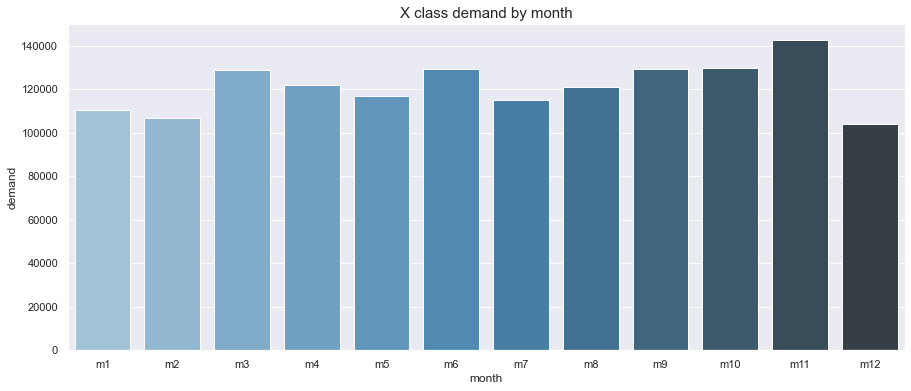

In [45]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="month", 
             y="demand", 
             data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='X'],
             palette="Blues_d")\
             .set_title("X class demand by month",fontsize=15)

- Y类商品的需求显示出较强的波动，10月11月的需求最多

Text(0.5, 1.0, 'Y class demand by month')

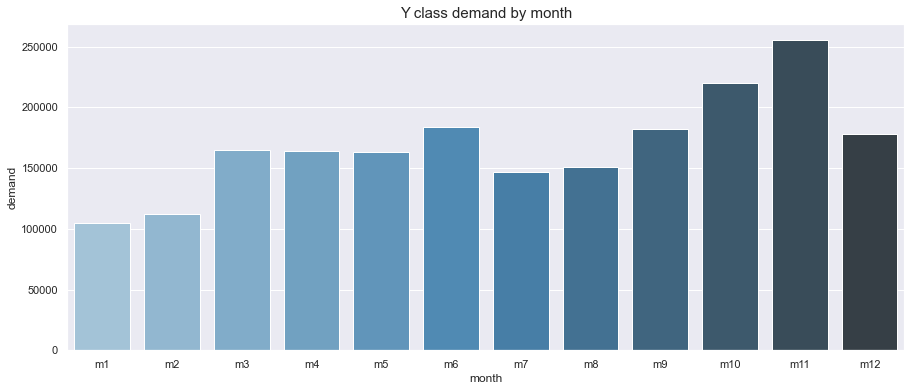

In [46]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="month", 
             y="demand", 
             data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Y'],
             palette="Blues_d")\
             .set_title("Y class demand by month",fontsize=15)

- Z类SKU是最不可预测的，因为有些商品每年仅销售一次。

Text(0.5, 1.0, 'Z class demand by month')

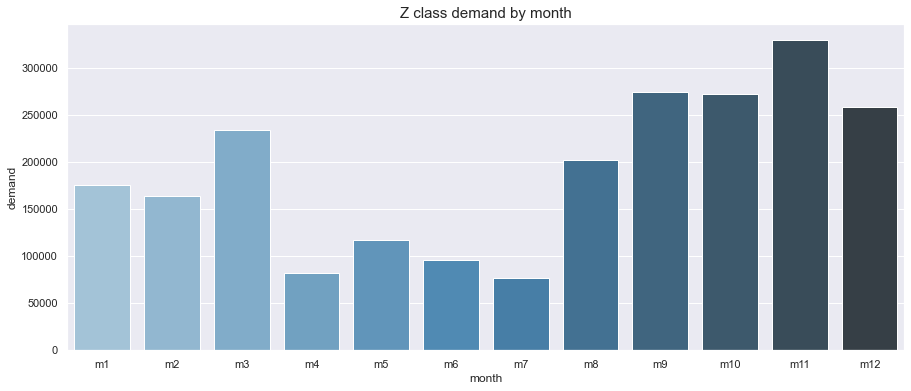

In [47]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="month", 
             y="demand", 
             data=df_monthly_unstacked[df_monthly_unstacked['xyz_class']=='Z'],
             palette="Blues_d")\
             .set_title("Z class demand by month",fontsize=15)

- 我们把XYZ类的数据绘制到一张图中，需求变化的对比会更加明显

Text(0.5, 1.0, 'XYZ demand by month')

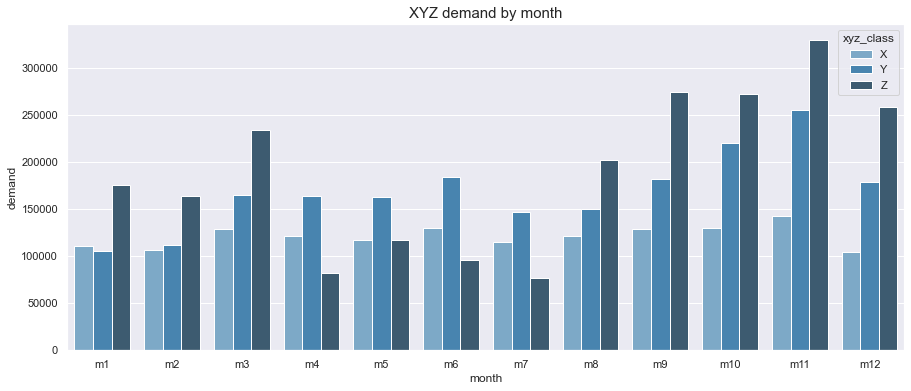

In [48]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="month", 
             y="demand", 
             hue="xyz_class", 
             data=df_monthly_unstacked,
             palette="Blues_d")\
            .set_title("XYZ demand by month",fontsize=15)

## 4 ABC库存分析

- 重新使用我们之前创建的 df_12m数据框，然后将运行聚合来计算每个SKU的收入指标。

In [49]:
df_skus = df_12m.groupby('sku').agg(
        unique_purchases=('sku', 'nunique'),
    total_units=('quantity', 'sum'),
    total_revenue=('revenue', 'sum'),
).sort_values('total_revenue', ascending=False).reset_index()

In [50]:
df_skus

,sku,unique_purchases,total_units,total_revenue
0,M,1,3004,263219.900
1,22423,1,15791,197948.470
2,85123A,1,55794,151668.630
3,DOT,1,735,122505.320
4,85099B,1,48255,86432.430
...,...,...,...,...
4106,84206B,1,4,0.760
4107,35955,1,1,0.420
4108,84205C,1,2,0.380
4109,84206C,1,1,0.190


In [57]:
df_skus['revenue_total'] = df_skus['total_revenue'].sum()

In [55]:
df_skus['revenue_cumsum'] = df_skus['total_revenue'].cumsum()

In [56]:
df_skus

,sku,unique_purchases,total_units,total_revenue,revenue_cumsum
0,M,1,3004,263219.900,2.632199e+05
1,22423,1,15791,197948.470,4.611684e+05
2,85123A,1,55794,151668.630,6.128370e+05
3,DOT,1,735,122505.320,7.353423e+05
4,85099B,1,48255,86432.430,8.217747e+05
...,...,...,...,...,...
4106,84206B,1,4,0.760,1.030432e+07
4107,35955,1,1,0.420,1.030433e+07
4108,84205C,1,2,0.380,1.030433e+07
4109,84206C,1,1,0.190,1.030433e+07


In [58]:
df_skus['revenue_running_percentage'] = (df_skus['revenue_cumsum'] / df_skus['revenue_total']) * 100



In [59]:
df_skus

,sku,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage
0,M,1,3004,263219.900,2.632199e+05,1.030433e+07,2.554460
1,22423,1,15791,197948.470,4.611684e+05,1.030433e+07,4.475483
2,85123A,1,55794,151668.630,6.128370e+05,1.030433e+07,5.947376
3,DOT,1,735,122505.320,7.353423e+05,1.030433e+07,7.136249
4,85099B,1,48255,86432.430,8.217747e+05,1.030433e+07,7.975046
...,...,...,...,...,...,...,...
4106,84206B,1,4,0.760,1.030432e+07,1.030433e+07,99.999990
4107,35955,1,1,0.420,1.030433e+07,1.030433e+07,99.999994
4108,84205C,1,2,0.380,1.030433e+07,1.030433e+07,99.999998
4109,84206C,1,1,0.190,1.030433e+07,1.030433e+07,100.000000


- 要计算ABC类别，我们需要知道所有SKU产生的总收入以及每个SKU产生的累积收入贡献百分比

In [60]:
def abc_classify_product(percentage):
    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 90:
        return 'B'
    else:
        return 'C'

In [61]:
df_skus['abc_class'] = df_skus['revenue_running_percentage'].apply(abc_classify_product)

In [62]:
df_skus

,sku,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class
0,M,1,3004,263219.900,2.632199e+05,1.030433e+07,2.554460,A
1,22423,1,15791,197948.470,4.611684e+05,1.030433e+07,4.475483,A
2,85123A,1,55794,151668.630,6.128370e+05,1.030433e+07,5.947376,A
3,DOT,1,735,122505.320,7.353423e+05,1.030433e+07,7.136249,A
4,85099B,1,48255,86432.430,8.217747e+05,1.030433e+07,7.975046,A
...,...,...,...,...,...,...,...,...
4106,84206B,1,4,0.760,1.030432e+07,1.030433e+07,99.999990,C
4107,35955,1,1,0.420,1.030433e+07,1.030433e+07,99.999994,C
4108,84205C,1,2,0.380,1.030433e+07,1.030433e+07,99.999998,C
4109,84206C,1,1,0.190,1.030433e+07,1.030433e+07,100.000000,C


- 我们需要按照SKU产生的总收入的降序对它们进行排序，这一点至关重要

- 与XYZ分类一样，我们创建一个函数，根据每个产品对收入百分比的贡献将其打上对应类别标签。 

- 应用上面的 abc_classify_product() 函数为每个SKU打上ABC标签

- 接下来检查ABC每个类的统计数据：

In [63]:
df_skus['revenue_running_percentage'].rank()

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
4106    4107.0
4107    4108.0
4108    4109.0
4109    4110.0
4110    4111.0
Name: revenue_running_percentage, Length: 4111, dtype: float64

In [64]:
df_skus['abc_rank'] = df_skus['revenue_running_percentage'].rank().astype(int)



In [65]:
df_skus

,sku,unique_purchases,total_units,total_revenue,revenue_cumsum,revenue_total,revenue_running_percentage,abc_class,abc_rank
0,M,1,3004,263219.900,2.632199e+05,1.030433e+07,2.554460,A,1
1,22423,1,15791,197948.470,4.611684e+05,1.030433e+07,4.475483,A,2
2,85123A,1,55794,151668.630,6.128370e+05,1.030433e+07,5.947376,A,3
3,DOT,1,735,122505.320,7.353423e+05,1.030433e+07,7.136249,A,4
4,85099B,1,48255,86432.430,8.217747e+05,1.030433e+07,7.975046,A,5
...,...,...,...,...,...,...,...,...,...
4106,84206B,1,4,0.760,1.030432e+07,1.030433e+07,99.999990,C,4107
4107,35955,1,1,0.420,1.030433e+07,1.030433e+07,99.999994,C,4108
4108,84205C,1,2,0.380,1.030433e+07,1.030433e+07,99.999998,C,4109
4109,84206C,1,1,0.190,1.030433e+07,1.030433e+07,100.000000,C,4110


In [66]:
df_abc = df_skus.groupby('abc_class').agg(
    total_skus=('sku', 'nunique'),
    total_units=('total_units', sum),
    total_revenue=('total_revenue', sum),
).reset_index()

In [67]:
df_abc

,abc_class,total_skus,total_units,total_revenue
0,A,856,3893074,8241671.610
1,B,542,835848,1031934.140
2,C,2713,1035265,1030720.224


- 以下对ABC每个类别的销售收入进行可视化

Text(0.5, 1.0, 'Revenue by ABC class')

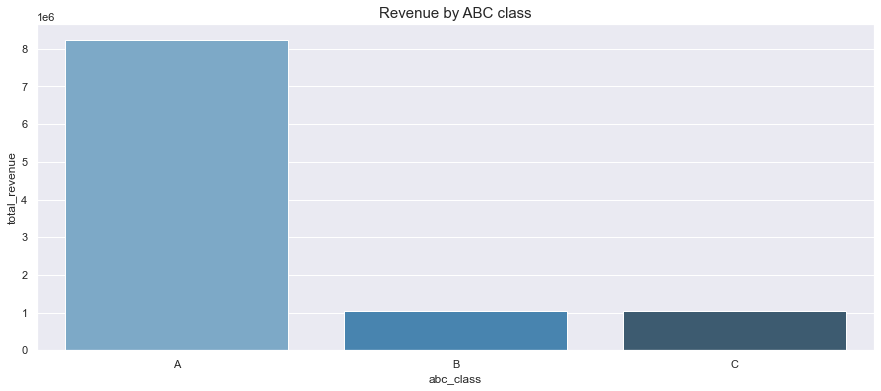

In [68]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="abc_class", 
             y="total_revenue", 
             data=df_abc,
             palette="Blues_d")\
            .set_title("Revenue by ABC class",fontsize=15)

- C类中存在大量SKU，仅占公司总收入的 10%。

Text(0.5, 1.0, 'SKUs by ABC class')

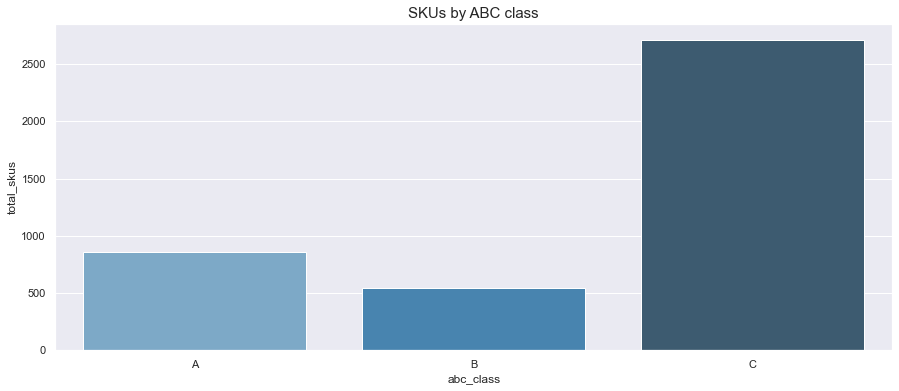

In [69]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="abc_class", 
                 y="total_skus", 
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("SKUs by ABC class",fontsize=15)

- 从销量来看，A类明显有很多，占收入的80%

Text(0.5, 1.0, 'Quantity by ABC class')

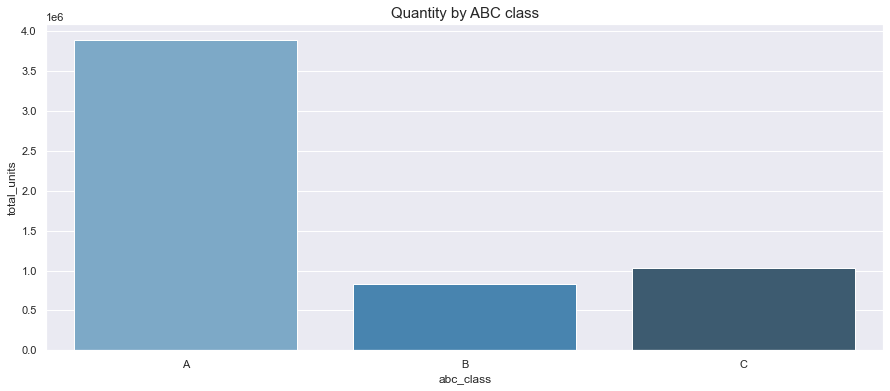

In [70]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="abc_class", 
             y="total_units", 
             data=df_abc,
             palette="Blues_d")\
            .set_title("Quantity by ABC class",fontsize=15)

## 5 ABC-XYZ库存分析

- 最后一步是将 XYZ 和 ABC 标签数据结合起来。

In [71]:
df_abc = df_skus[['sku','abc_class','abc_rank','total_revenue']]

In [78]:
df_xyz = df_12m_units.copy()

In [79]:
df_abc_xyz = df_abc.merge(df_xyz, on='sku', how='left')

In [80]:
df_abc_xyz

,sku,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class
0,M,A,1,263219.900,16.0,60.0,733.0,386.0,219.0,331.0,...,64.0,214.0,118.0,435.0,320.0,205.108988,3004.0,250.333333,0.819343,Y
1,22423,A,2,197948.470,0.0,0.0,751.0,1167.0,540.0,1356.0,...,1046.0,2061.0,1965.0,2210.0,3151.0,937.912814,15791.0,1315.916667,0.712745,Y
2,85123A,A,3,151668.630,5486.0,2911.0,5076.0,3702.0,4435.0,4350.0,...,4708.0,4394.0,4586.0,6542.0,5576.0,945.632977,55794.0,4649.500000,0.203384,X
3,DOT,A,4,122505.320,46.0,50.0,71.0,62.0,65.0,68.0,...,58.0,61.0,56.0,59.0,75.0,8.280591,735.0,61.250000,0.135193,X
4,85099B,A,5,86432.430,3572.0,2662.0,3259.0,3947.0,3616.0,4332.0,...,1861.0,7033.0,4376.0,6435.0,3569.0,1445.180085,48255.0,4021.250000,0.359386,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,84206B,C,4107,0.760,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,1.154701,4.0,0.333333,3.464102,Z
4107,35955,C,4108,0.420,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z
4108,84205C,C,4109,0.380,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.577350,2.0,0.166667,3.464102,Z
4109,84206C,C,4110,0.190,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z


- 创建ABC-XYZ分类

In [81]:
df_abc_xyz['abc_xyz_class'] = df_abc_xyz['abc_class'].astype(str) + df_abc_xyz['xyz_class'].astype(str)

In [82]:
df_abc_xyz

,sku,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class,abc_xyz_class
0,M,A,1,263219.900,16.0,60.0,733.0,386.0,219.0,331.0,...,214.0,118.0,435.0,320.0,205.108988,3004.0,250.333333,0.819343,Y,AY
1,22423,A,2,197948.470,0.0,0.0,751.0,1167.0,540.0,1356.0,...,2061.0,1965.0,2210.0,3151.0,937.912814,15791.0,1315.916667,0.712745,Y,AY
2,85123A,A,3,151668.630,5486.0,2911.0,5076.0,3702.0,4435.0,4350.0,...,4394.0,4586.0,6542.0,5576.0,945.632977,55794.0,4649.500000,0.203384,X,AX
3,DOT,A,4,122505.320,46.0,50.0,71.0,62.0,65.0,68.0,...,61.0,56.0,59.0,75.0,8.280591,735.0,61.250000,0.135193,X,AX
4,85099B,A,5,86432.430,3572.0,2662.0,3259.0,3947.0,3616.0,4332.0,...,7033.0,4376.0,6435.0,3569.0,1445.180085,48255.0,4021.250000,0.359386,X,AX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,84206B,C,4107,0.760,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.154701,4.0,0.333333,3.464102,Z,CZ
4107,35955,C,4108,0.420,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z,CZ
4108,84205C,C,4109,0.380,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.577350,2.0,0.166667,3.464102,Z,CZ
4109,84206C,C,4110,0.190,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.288675,1.0,0.083333,3.464102,Z,CZ


- 通过下面的结果看出

In [83]:
df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(
    total_skus=('sku', 'nunique'),
    total_demand=('total_demand', sum),
    avg_demand=('avg_demand', 'mean'),    
    total_revenue=('total_revenue', sum),    
).reset_index()

df_abc_xyz_summary.sort_values(by='total_revenue', ascending=False)

,abc_xyz_class,total_skus,total_demand,avg_demand,total_revenue
1,AY,348,1528028.0,365.907088,3532677.560
2,AZ,317,1046135.0,275.009201,2365108.360
0,AX,191,1318911.0,575.441099,2343885.690
8,CZ,2164,762485.0,29.362485,708884.954
5,BZ,315,472827.0,125.086508,594016.900
4,BY,181,278019.0,128.001381,344828.710
7,CY,498,219662.0,36.757363,277108.440
3,BX,46,85002.0,153.989130,93088.530
6,CX,51,53118.0,86.794118,44726.830


Text(0.5, 1.0, 'SKUs by ABC-XYZ class')

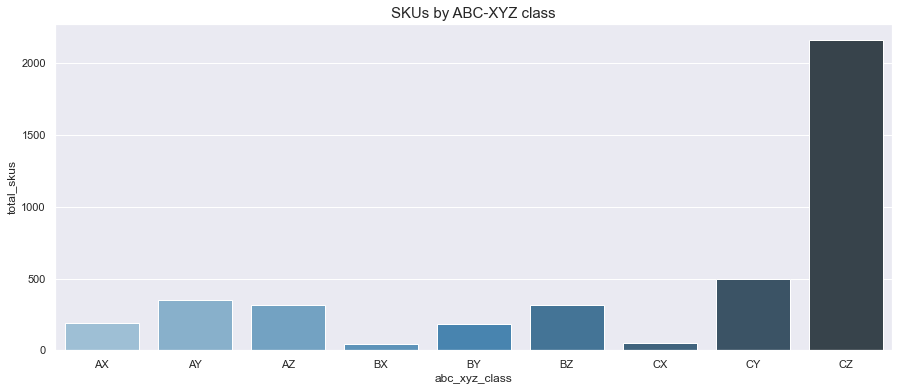

In [84]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="abc_xyz_class", 
             y="total_skus", 
             data=df_abc_xyz_summary,
             palette="Blues_d")\
            .set_title("SKUs by ABC-XYZ class",fontsize=15)

Text(0.5, 1.0, 'Revenue by ABC-XYZ class')

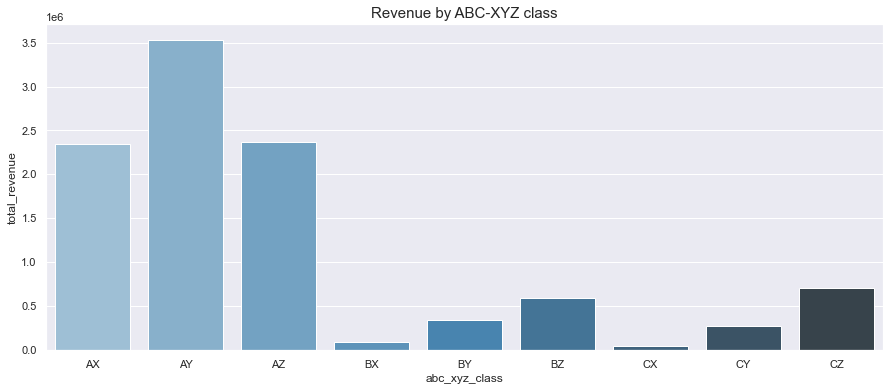

In [85]:
plt.subplots(figsize=(15, 6))
sns.barplot(x="abc_xyz_class", 
             y="total_revenue", 
             data=df_abc_xyz_summary, 
             palette="Blues_d")\
            .set_title("Revenue by ABC-XYZ class",fontsize=15)